<a href="https://colab.research.google.com/github/abdulqadir100/be_zen/blob/main/be_zen_pandas_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. installing the required libraries

In [1]:
!pip install pyunpack
!pip install rarfile
!pip install patool
!pip install gdown

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install pyspark
!pip install findspark

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### 2. importing the required libraries

In [3]:
from pyunpack import Archive
import rarfile
import gdown
import pandas as pd
import numpy as np
import pyspark.pandas as ps


### 3.helper functions for use in the code

In [4]:
### a function of extract a rarfile
def extract_rar(file):
    rar = rarfile.RarFile(file)
    Archive(file).extractall('/content')

## a function to replace boolean values True and False with 1 and 0 respectively
def bool_replace(x):
  x=  str(x)
  if x=='True':
    return 1
  else:
    return 0

## a function to return correct prices with the currency of the price included 
def correct_price(x):
    if type(x) == str:
        if '$' in x:
            return x
        else:
            x = '$' + x
            return x
    else:
        return x

### this function extracts  value(monetary amount) from a price(currency and value)
def extract_values(x):
    x = str(x)
    try :
        x = float(x[1:])   
        return x
    except:
        return np.nan

### 4. downloading the zipped file 

In [5]:
## assigning the google drice which contains the zipped file to a variable
url = 'https://drive.google.com/uc?id=1nMTwouqN1arIk02fjvLLjCDKqNnNlLWw'
## name to the zipped file
output = 'test.rar'
## downloading the file from google drive to colab directory
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1nMTwouqN1arIk02fjvLLjCDKqNnNlLWw
To: /content/test.rar
100%|██████████| 44.0M/44.0M [00:00<00:00, 69.3MB/s]


'test.rar'

### 5. unzipping the saved test.rar file and saving its content to colab directory 

In [ ]:
extract_rar('/content/test.rar')

### 6. Using pandas to load a small chunk of the data for data visualization

#### dataset columns
* UUID (Primary Key)
* Price (String) 
*Price_unfiltered (String)
*Product Type
*Category
*Level 1 -> This is just a classification of a product.


In [7]:
## reading 100000 values 
dataset  = pd.read_csv('/content/2022_02_08-02_30_31_AM.csv',chunksize = 100000)
dataset = next(dataset)

In [8]:
## A peak at what the data looks like 
dataset.head()

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw


In [9]:
##the dimension of the loaded chunk of data
dataset.shape

(100000, 6)

In [10]:
## a summary of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   uuid              100000 non-null  object
 1   price_string      40149 non-null   object
 2   price_string_unf  2321 non-null    object
 3   product_type      99929 non-null   object
 4   level_1           99628 non-null   object
 5   category          99929 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


 *  Top 10 product id 

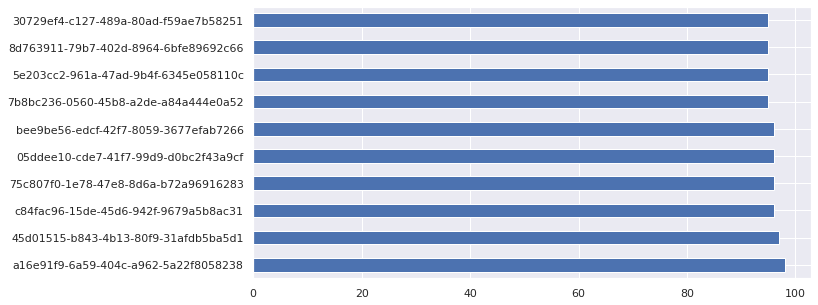

In [11]:
plt.figure(figsize = (10,5))
dataset.uuid.value_counts().head(10).plot(kind=  'barh')

* Top 10 product types

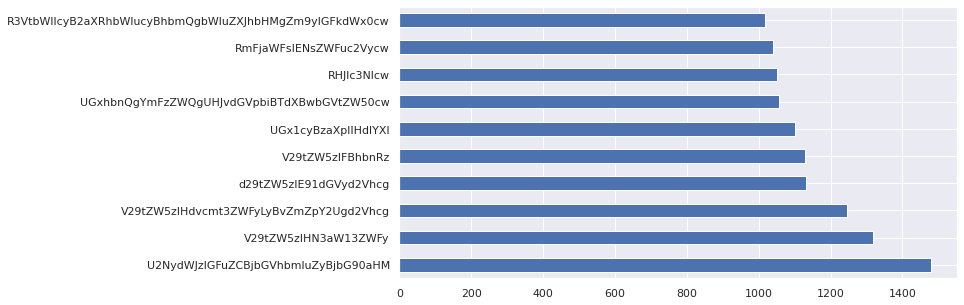

In [12]:
plt.figure(figsize = (10,5))
dataset.product_type.value_counts().head(10).plot(kind=  'barh')

 * Product categories and their count

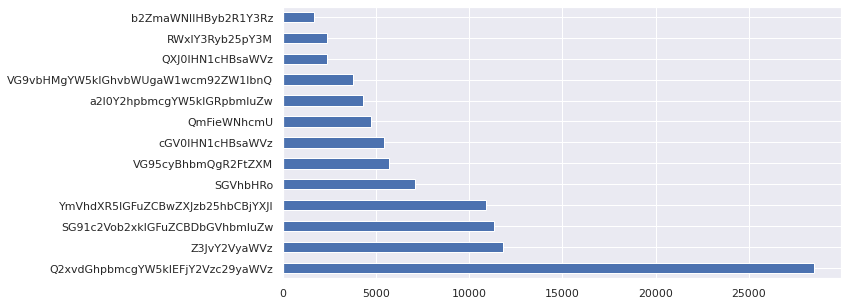

In [13]:
plt.figure(figsize = (10,5))
dataset.category.value_counts().plot(kind=  'barh')

* Top 15 classes in the level_1 column

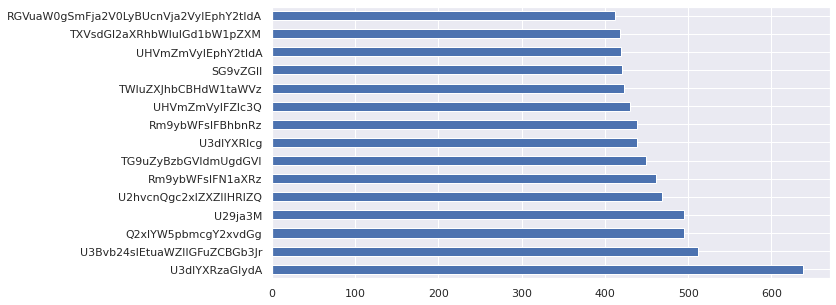

In [14]:
plt.figure(figsize = (10,5))
dataset.level_1.value_counts().head(15).plot(kind=  'barh')

### 6. importing the extracted csv file using pyspark

In [15]:
df  =  ps.read_csv('/content/2022_02_08-02_30_31_AM.csv')

pyspark is used in loading the data because data is not actually loaded into the RAM memory because of its large size. Data is only loaded when an action is called on the pyspark variable, an action that needs to return a computed value while loading all this data in pandas without breaking it into chunks will cause out of memory error.

In [16]:
## checking the shape of the data
df.shape

(13790000, 6)

In [17]:
## checking for the number of unique columns across the dataset
df.nunique()

uuid                1379
price_string         251
price_string_unf      30
product_type         323
level_1              595
category              13
dtype: int64

## Question 1.Products without prices

In [18]:
###creating two new columns to holds boolean records of if the "price_string" column has a value or if it is empty
df['with_price'] = df.price_string.notnull()
df['without_price'] = df.price_string.isnull()

## replacting the generated boolean (True, False) with  1,0 where applicable for both columns using the 'bool_replace' function
df.with_price = df.with_price.apply(bool_replace)
df.without_price = df.without_price.apply(bool_replace)

In [19]:
## getting products without prices by filtering the dataset with the created 'withour_price' column
product_without_price = df[df.without_price==1]

In [20]:
## 5 sample products from the generated products without price data
product_without_price.head()

,uuid,price_string,price_string_unf,product_type,level_1,category,with_price,without_price
0,638744a4-b0ae-4166-8cb6-5c063c862036,None,None,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,0,1
1,ab313969-02cc-48b2-9daf-0054efb70b92,None,None,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,0,1
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,None,None,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,TW9uayBGcnVpdA,Z3JvY2VyaWVz,0,1
13,1f2766ec-0a27-43f8-b28b-77a44492ead1,None,None,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U2NydWJz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,0,1
16,7bad39f5-74b9-4611-afb9-46fb135190cd,None,None,UGx1cyBzaXplIHdlYXIgZHJlc3M,RHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,0,1


##Question 2. Count of products without prices and with prices in each Product Type, Category, Level1

In [21]:
## grouping the dataset with 'product_type','category' and  'level_1' columns and aggregating by the sum to get the count of products with and without prices
product_count = df.groupby([ 'product_type','category', 'level_1']).sum()[['with_price','without_price']]
product_count.head(10)

,,,with_price,without_price
product_type,category,level_1,,
Rm9vZCBTdG9yYWdl,a2l0Y2hpbmcgYW5kIGRpbmluZw,V3JhcHMgYW5kIENvdmVycw,10000,20000
Q3JhZnQgcmliYm9ucw,QXJ0IHN1cHBsaWVz,Q3JhZnQgcmliYm9ucw,10000,0
UGFwZXIgVG93ZWwgQWx0ZXJuYXRpdmVz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,RGlzaGNsb3Ro,0,30000
TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,Z3JvY2VyaWVz,U3Rldmlh,10000,10000
V2F0ZXIgRmlsdGVyIERpc3BlbnNlcg,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,MzAgQ3Vw,10000,0
U2hhdmluZyBDcmVhbQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,U2hhdmluZyBDcmVhbQ,10000,0
QmFieSBXaXBlcw,QmFieWNhcmU,QmFieSBXaXBlcw,10000,10000
TWF0ZXJuaXR5IFRzaGlydA,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,TWF0ZXJuaXR5IFNob3J0IHNsZWV2ZSB0ZWU,0,30000
RHV2ZXQgY292ZXJz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,c2F0ZWVuIGR1dmV0IGNvdmVy,10000,20000


## 3.Correct Product Prices in the correct format (eg: $56) wherever possible and separate them into currency and value columns.

In [22]:
df.head()

,uuid,price_string,price_string_unf,product_type,level_1,category,with_price,without_price
0,638744a4-b0ae-4166-8cb6-5c063c862036,None,None,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,0,1
1,ab313969-02cc-48b2-9daf-0054efb70b92,None,None,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,0,1
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,None,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,1,0
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,None,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,1,0
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,None,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,1,0


In [23]:
## applying the function 'correct_price' to unify the format of the 'price_string' column
df.price_string = df.price_string.apply(correct_price)

In [24]:
df.head()

,uuid,price_string,price_string_unf,product_type,level_1,category,with_price,without_price
0,638744a4-b0ae-4166-8cb6-5c063c862036,None,None,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,0,1
1,ab313969-02cc-48b2-9daf-0054efb70b92,None,None,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,0,1
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,None,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,1,0
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,None,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,1,0
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,$11.50,None,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,1,0


In [25]:
## creating a seperate column for the currency from the 'price_string' column
df['currency'] =df.price_string.apply(lambda x:x[0] if type(x) == str else np.nan )

In [26]:
df.head()

,uuid,price_string,price_string_unf,product_type,level_1,category,with_price,without_price,currency
0,638744a4-b0ae-4166-8cb6-5c063c862036,None,None,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,0,1,None
1,ab313969-02cc-48b2-9daf-0054efb70b92,None,None,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,0,1,None
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,None,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,1,0,$
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,None,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,1,0,$
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,$11.50,None,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,1,0,$


In [27]:
df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 13790000 entries, 0 to 13789999
Data columns (total 9 columns):
 #   Column            Non-Null Count     Dtype 
---  ------            --------------     ----- 
 0   uuid              13790000 non-null  object
 1   price_string      5570000 non-null   object
 2   price_string_unf  370000 non-null    object
 3   product_type      13720000 non-null  object
 4   level_1           13620000 non-null  object
 5   category          13660000 non-null  object
 6   with_price        13790000 non-null  int64 
 7   without_price     13790000 non-null  int64 
 8   currency          5570000 non-null   object
dtypes: int64(2), object(7)

In [28]:
## extracting the currency value from the 'price_string' column using the 'extract values' function 
df['values'] = df.price_string.apply(extract_values)

## 4.List out the categories with average price of product.

In [29]:
## getting the average product price by creating  mean aggregates over the different product categories 
categories_avg_price  = df[df.with_price == 1].groupby('category').mean()['values']

In [30]:
categories_avg_price

category
QmFieWNhcmU                            163.688889
QXJ0IHN1cHBsaWVz                        19.471053
cGV0IHN1cHBsaWVz                        14.181875
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          76.199000
b2ZmaWNlIHByb2R1Y3Rz                    20.480000
a2l0Y2hpbmcgYW5kIGRpbmluZw              16.703235
SGVhbHRo                                32.557586
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       124.842283
RWxlY3Ryb25pY3M                         60.258182
Z3JvY2VyaWVz                            10.541667
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        34.745067
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     82.223500
VG95cyBhbmQgR2FtZXM                     32.448947
Name: values, dtype: float64

* Product categories and their average price

In [31]:
categories_avg_price.plot(kind = 'barh')